In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Python reads '\' as escape and might give an error , hence to avoid this we use r in prefix

path = r"C:\Users\chira\Downloads\XAUUSD_sample_2025.csv"

df = pd.read_csv(path)

In [2]:
df.tail()

,Date,Close
124,2025-06-24,1993.835817
125,2025-06-25,1988.175649
126,2025-06-26,1992.163630
127,2025-06-27,1983.221274
128,2025-06-30,1990.829715


In [3]:
## Calculating Moving average of 7

df["MA_7"] = df["Close"].rolling(window = 7).mean()

df.tail()

,Date,Close,MA_7
124,2025-06-24,1993.835817,1994.823065
125,2025-06-25,1988.175649,1994.176049
126,2025-06-26,1992.163630,1993.750836
127,2025-06-27,1983.221274,1992.654173
128,2025-06-30,1990.829715,1992.155982


In [4]:
## Creating BUY Signal
## astype(int) creates boolean to int


df["Signal"] = (df["Close"] > df["MA_7"]).astype(int)

df.tail()

,Date,Close,MA_7,Signal
124,2025-06-24,1993.835817,1994.823065,0
125,2025-06-25,1988.175649,1994.176049,0
126,2025-06-26,1992.163630,1993.750836,0
127,2025-06-27,1983.221274,1992.654173,0
128,2025-06-30,1990.829715,1992.155982,0


Backtesting the MA Buy Signal on XAUUSD

In [5]:
## Creating an empty list to store the trade returns

strategy_returns = []

for i in range(len(df) - 6):
    if df.loc[i, "Signal"] == 1:
        entry_price = df.loc[i + 1, "Close"]
        exit_price = df.loc[i + 6, "Close"]
        return_pct = (entry_price - exit_price) / entry_price
        strategy_returns.append(return_pct)



In [24]:
print(strategy_returns)



[0.0034477493596381716, 0.0012173096801091454, 0.00305074978342941, 0.00856368073978241, 0.0049518236729614185, 0.007378310616428549, 0.0047395334182730765, 0.006029430540463486, 0.007707454618656524, 0.0037917699175923853, 0.0032258294303317767, 0.004262054107997121, -0.0008889031980186058, -0.012133664855318551, -0.001556203258187026, -0.004052904602913404, -0.0038603229132670902, -0.005356067342368679, -0.006103402185342137, -0.006109022179460326, -0.0020148068292995367, -0.0033506474901451597, -0.0007621570592282865, 0.001955901395663135, 0.0002085188449995095, -0.0038202799098160014, -0.00575337321110423, -0.0057178362737565405, -0.010635733608902697, 0.0028635664710003348, 0.005543033773834976, 0.010232215877822175, 0.008351975887004622, 0.006977803090548122, 0.005691723646142063, -0.004595170955488187, -0.0018772667215346873, 0.005897945469790614, 0.005687659327463763, 0.005679390781936471, 0.011926892414821597, 0.0065683554822719694, 0.0014158044018720676, -0.003179665319152984

In [23]:
# Converting to Series, BECAUSE we easily get mean(), meadian() , prod() etc. for compounding

returns_series = pd.Series(strategy_returns)


### calculating the cumulative return from multiple trades, assuming you reinvest gains from each trade into the next one.
# Compounded Return

#  1 + converts each return into a growth factor so that simple multiplication correctly chains the gains and losses. 
#  Without the +1, multiplication would give meaningless numbers.

## -1 is for getting percentage and .prod() multiples the values inside a list[] i.e series

cumulative_return = (1 + returns_series).prod() - 1


In [8]:
print(f"Total Trades: {len(strategy_returns)}")
print(f"Average Return per Trade: {returns_series.mean():.4%}")
print(f"Cumulative Strategy Return: {cumulative_return:.2%}")

Total Trades: 49
Average Return per Trade: 0.1431%
Cumulative Strategy Return: 7.18%


Plot cumulative returns vs buy-and-hold



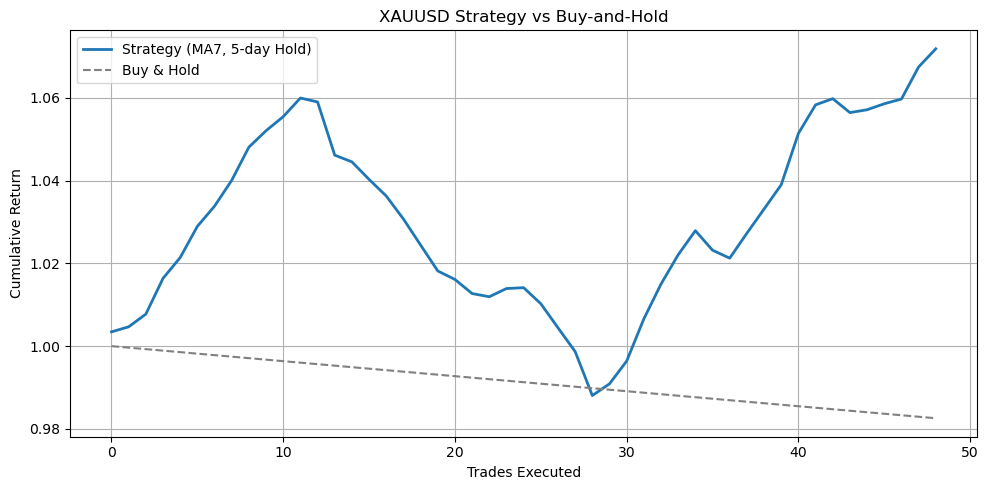

In [27]:
strategy_equity = (1 + returns_series).cumprod()


# Buy-and-hold: assume buy on Day 1, hold till end
buy_hold_return = df['Close'].iloc[-1] / df['Close'].iloc[0]


buy_hold_series = pd.Series([1, buy_hold_return], index=[0, len(strategy_equity) - 1])


plt.figure(figsize = (10,5))
plt.plot(strategy_equity.values, label = "Strategy (MA7, 5-day Hold)", linewidth = 2)

plt.plot(buy_hold_series.index, buy_hold_series.values, label="Buy & Hold", linestyle="--", color="gray")
plt.title("XAUUSD Strategy vs Buy-and-Hold")
plt.xlabel("Trades Executed")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("xauusd_strategy_vs_bh.png")
plt.show()

In [ ]:
### Further Improvements :   Stoploss, Target Price, Trailing, Position sizing